In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [3]:
df = pd.read_csv(r"Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [64]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [65]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [3]:
most_common_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'] = df['Cuisines'].fillna(most_common_cuisine)

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

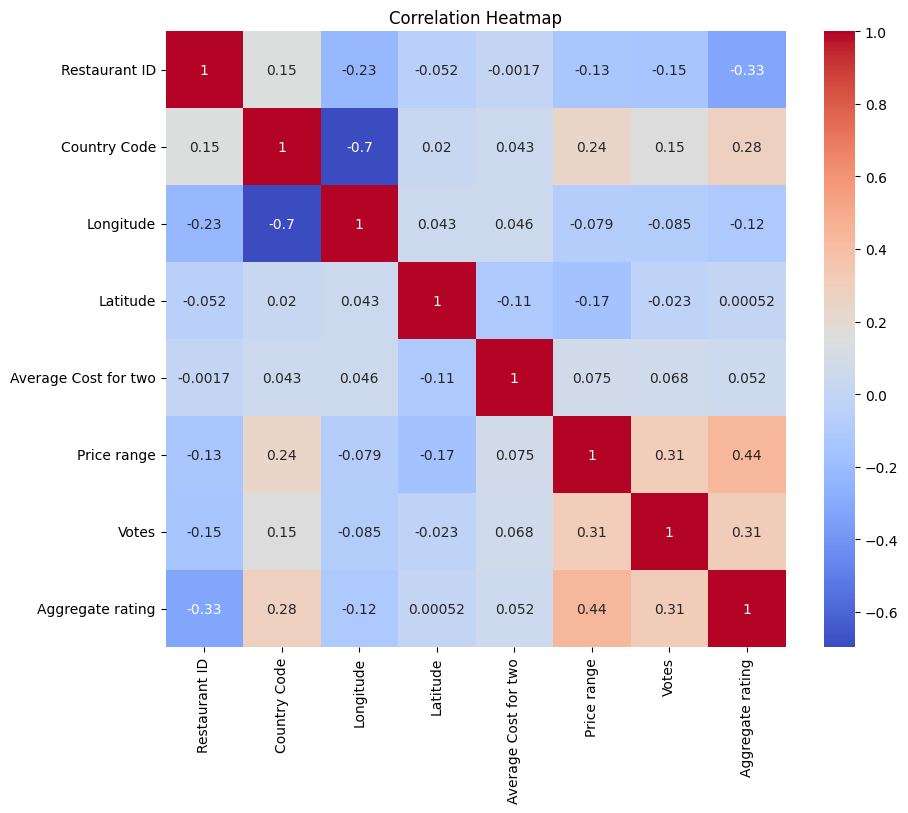

In [5]:
numerical_features = (df.select_dtypes(include=[np.number]).drop(columns=['Aggregate rating']).columns.tolist())

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features + ['Aggregate rating']].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

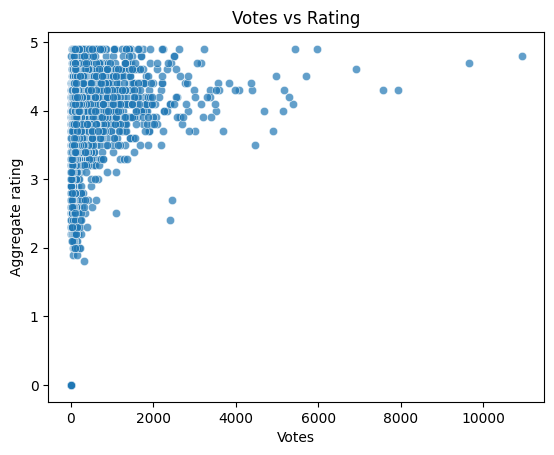

In [70]:
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.7)
plt.title("Votes vs Rating")
plt.show()

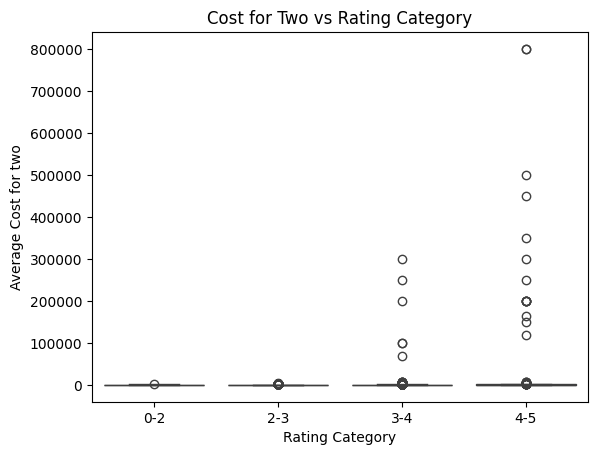

In [6]:
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5'])

sns.boxplot(data=df, x='Rating Category', y='Average Cost for two')
plt.title("Cost for Two vs Rating Category")
plt.show()

In [20]:
df['Cuisine_Count'] = df['Cuisines'].apply(lambda x: len(x.split(',')))
df['Log_Cost'] = np.log1p(df['Average Cost for two'])

In [21]:
df['Cuisine_List'] = df['Cuisines'].apply(lambda x: [i.strip() for i in x.split(',')])
mlb = MultiLabelBinarizer()
cuisine_df = pd.DataFrame(mlb.fit_transform(df['Cuisine_List']), columns=mlb.classes_)

In [22]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Rating Category', 'Cuisine_Count', 'Cuisine_List',
       'Log_Cost'],
      dtype='object')

In [23]:
model_df = df.copy()
categorical_features = ['City', 'Locality', 'Locality Verbose', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']

encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    model_df[column] = le.fit_transform(model_df[column])
    encoders[column] = le

In [24]:
model_df = pd.concat([model_df, cuisine_df], axis=1)

In [25]:
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Cuisines', 'Cuisine_List', 'Rating color', 'Rating text', 'Rating Category', 'Longitude', 'Latitude']  
X = model_df.drop(columns=columns_to_drop + ['Aggregate rating'])

y = model_df['Aggregate rating']

In [26]:
X.head()

,Country Code,City,Locality,Locality Verbose,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,162,73,171,172,1100,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,162,73,593,601,1200,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,162,75,308,314,4000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,162,75,862,875,1500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,162,75,862,875,1500,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
scaler_selection = StandardScaler()
X_scaled = pd.DataFrame(scaler_selection.fit_transform(X), columns=X.columns)

In [28]:
selector = SelectKBest(score_func=f_regression, k=15)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]

print(f"Selected {len(selected_features)} features:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

Selected 15 features:
1. Country Code
2. City
3. Locality
4. Locality Verbose
5. Has Table booking
6. Has Online delivery
7. Price range
8. Votes
9. Cuisine_Count
10. Log_Cost
11. American
12. Asian
13. Cafe
14. Continental
15. Italian


In [29]:
X_selected_df = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42)

In [30]:
numerical_cols = [col for col in X_train.columns if col not in mlb.classes_]
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
model_performances = {}

In [32]:
for name, model in models.items():
    print(f"...{name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

    model_performances[name] = {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

...Linear Regression...
Linear Regression - RMSE: 1.2369, R²: 0.3278
...Decision Tree...
Decision Tree - RMSE: 0.4388, R²: 0.9154
...Random Forest...
Random Forest - RMSE: 0.3161, R²: 0.9561


In [116]:
best_model_name = max(model_performances.keys(), key=lambda k: model_performances[k]['r2'])
best_model = model_performances[best_model_name]['model']
best_r2 = model_performances[best_model_name]['r2']
best_rmse = model_performances[best_model_name]['rmse']

print(f"\nBest model: {best_model_name} with R² = {best_r2:.4f} and RMSE = {best_rmse:.4f}")


Best model: Random Forest with R² = 0.9561 and RMSE = 0.3161



Top 10 Most Important Features:
                Feature  Importance
7                 Votes    0.951899
9              Log_Cost    0.008530
0          Country Code    0.008224
3      Locality Verbose    0.006710
2              Locality    0.006459
1                  City    0.006109
8         Cuisine_Count    0.003425
5   Has Online delivery    0.001851
6           Price range    0.001457
13          Continental    0.001308


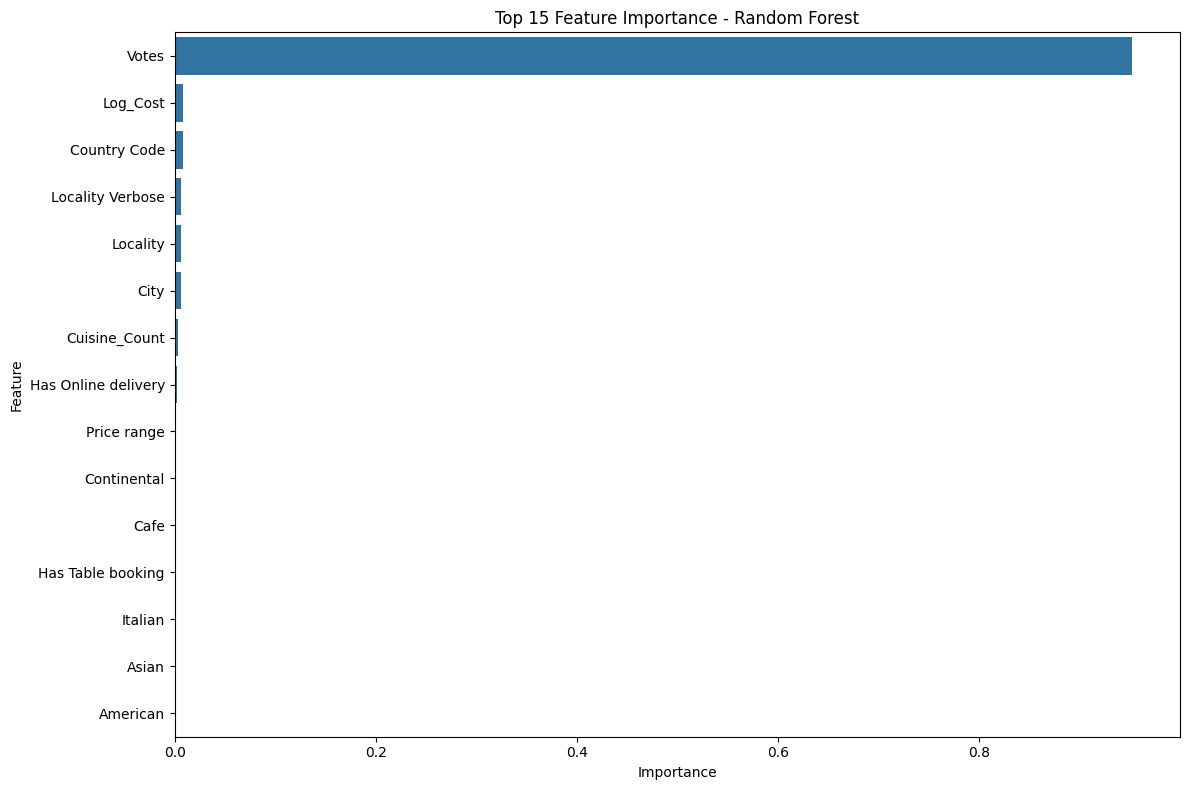

In [121]:
feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title(f'Top 15 Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

In [122]:
model_artifacts = {
    'model': best_model,
    'scaler': scaler,
    'selector': selector,
    'selected_features': selected_features.tolist(),
    'feature_importances' : feature_importance,
    'scaler_selection': scaler_selection,
    'encoders': encoders,
    'cuisine_mlb': mlb,
    'model_type': best_model_name,
    'features': X_train.columns.tolist(),
    'performance': {
        'r2': best_r2,
        'rmse': best_rmse
    }
}

In [123]:
model_save_path = 'restaurant_rating_predictor.pkl'
joblib.dump(model_artifacts, model_save_path)
print(f"Model and preprocessing objects saved successfully as '{model_save_path}'")
print(f"Model save location: {os.path.abspath(model_save_path)}")

Model and preprocessing objects saved successfully as 'restaurant_rating_predictor.pkl'
Model save location: d:\Ravija\Cognifyz Technologies\Task1\restaurant_rating_predictor.pkl
